In [74]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
data = yf.download('AAPL','2008-01-01','2023-03-15')

[*********************100%***********************]  1 of 1 completed


In [102]:
data.shape

(3826, 1)

In [76]:
data.tail(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-31,142.699997,144.339996,142.279999,144.289993,144.070023,65874500
2023-02-01,143.970001,146.610001,141.320007,145.429993,145.208282,77663600
2023-02-02,148.899994,151.179993,148.169998,150.820007,150.590088,118339000
2023-02-03,148.029999,157.380005,147.830002,154.500000,154.264465,154357300
2023-02-06,152.570007,153.100006,150.779999,151.729996,151.498688,69858300
2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700


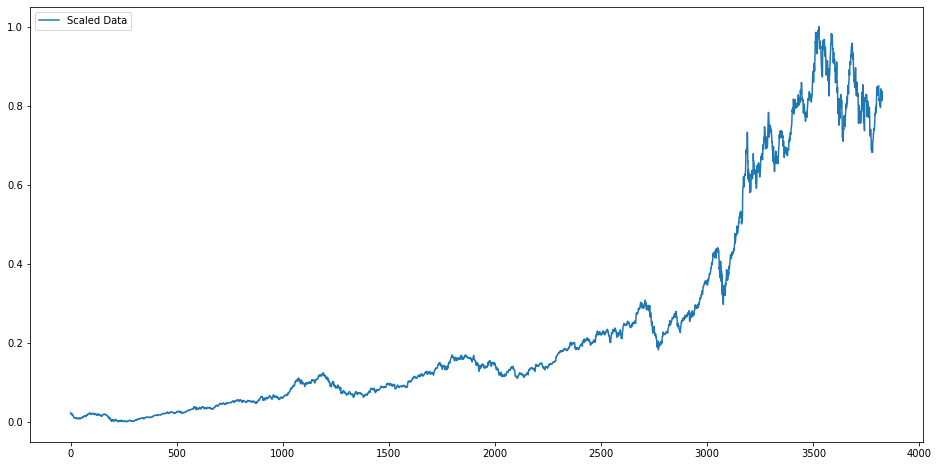

In [77]:
#Scale the data and plot the scaled data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

#plot the scaled data from day 0 to current day
plt.figure(figsize=(16,8))
plt.plot(scaled_data, label='Scaled Data')
plt.legend(loc='upper left')
plt.show()

In [78]:
scaled_data.shape

(3826, 1)

In [79]:
print(scaled_data)

[[0.02324395]
 [0.02326189]
 [0.02029661]
 ...
 [0.81302014]
 [0.8240124 ]
 [0.8358416 ]]


In [80]:
#Create a new dataframe with only the 'Close' column
data = data.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on (80% of the data)
training_size = int(np.ceil( len(scaled_data) * .8 ))
test_size = int(np.ceil( len(scaled_data) * .2 ))

#2860 is 80 percent of the total number of rows in the dataset
print("Total Rows in Training Dataset: ", training_size)
print("Total Rows in Testing Dataset: ", test_size)

Total Rows in Training Dataset:  3061
Total Rows in Testing Dataset:  766


In [81]:
#Split the data in to training and testing data, 80% training and 20% testing starting from the beginning of the dataset
train_data = scaled_data[0:training_size , :] #From 0 to 3061
test_data = scaled_data[training_size:len(scaled_data), :] #From 3061 to the end

#remove null values
train_data = train_data[~np.isnan(train_data).any(axis=1)]
test_data = test_data[~np.isnan(test_data).any(axis=1)]

#print the shape of the training and testing data
print("Training Data Shape: ", train_data.shape)
print("Testing Data Shape: ", test_data.shape)

Training Data Shape:  (3061, 1)
Testing Data Shape:  (765, 1)


In [82]:
#Time step is the number of days we want to look back to predict the next closing price
#We need use the training data to create the x_train and y_train data sets where x_train is the closing price of the previous 14 years and y_train is the closing price of the next day
#if data is 120, 130, 125, 140, 134, and 150 then x_train would be 120, 130, 125, 140, 134 and y_train would be 150
#We will do the same for the test data and then check the accuracy of the model

#Function to create the x_train and y_train data sets
def create_dataset (dataset, time_step=1):
    dataX, dataY = [], []
    #Loop through the data and create the x_train and y_train data sets
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] #Start from 0 to time_step and add to a
        dataX.append(a) #Store the values from 0 to time_step in dataX
        dataY.append(dataset[i+time_step, 0]) #Store the value of the next day in dataY
    return np.array(dataX), np.array(dataY) #Return the training data and the testing data as numpy arrays

In [83]:
#time step is the number of days we want to look back to predict the next closing price and we will use 30 days for this model (Hyperparamater Tuning) 
time_step = 30

#Create the training data set
x_train, y_train = create_dataset(train_data, time_step)

#180 features and 2550 rows
print (x_train.shape) #the training data should have 30 features for 30 days
print (y_train.shape)

(3030, 30)
(3030,)


In [84]:
#Create the testing data set
x_test, y_test = create_dataset(test_data, time_step)

#180 features an 730 rows
print(x_test.shape)
print(y_test.shape)

(734, 30)
(734,)


In [85]:
#Reshape the data to fit the LSTM model
#The LSTM model expects the data to be in the form of [samples, time steps, features] and right now our data is in the form [samples, features]
#The last two parameters are fed to the LSTM model as input
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [86]:
#Create a LSTM model
model = Sequential()
#Add the first LSTM layer and c
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

#One final output layer to predict the closing price
model.add(Dense(1))

#Compile the model with the adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [88]:
#Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64, verbose=1)

Epoch 1/5
48/48 [==============================] - 17s 142ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 2/5
48/48 [==============================] - 5s 96ms/step - loss: 7.5268e-05 - val_loss: 0.0017
Epoch 3/5
48/48 [==============================] - 2s 50ms/step - loss: 7.1018e-05 - val_loss: 0.0022
Epoch 4/5
48/48 [==============================] - 3s 56ms/step - loss: 7.1462e-05 - val_loss: 0.0029
Epoch 5/5
48/48 [==============================] - 2s 45ms/step - loss: 7.4582e-05 - val_loss: 0.0020


In [89]:
#Get the training data predictions and convert to the original scale
train_predict = model.predict(x_train)
train_predict = scaler.inverse_transform(train_predict)

95/95 [==============================] - 2s 11ms/step


In [90]:
#Get the testing data predictions and convert to the original scale
test_predict = model.predict(x_test)
test_predict = scaler.inverse_transform(test_predict)


23/23 [==============================] - 0s 13ms/step


In [ ]:
#Calculate the root mean squared error (RMSE) for training and testing data to evaluate the model
rmse_train = np.sqrt(mean_squared_error(y_train, train_predict))
rmse_test = np.sqrt(mean_squared_error(y_test, test_predict))

print("RMSE Training Data: ", rmse_train)
print("RMSE Testing Data: ", rmse_test)

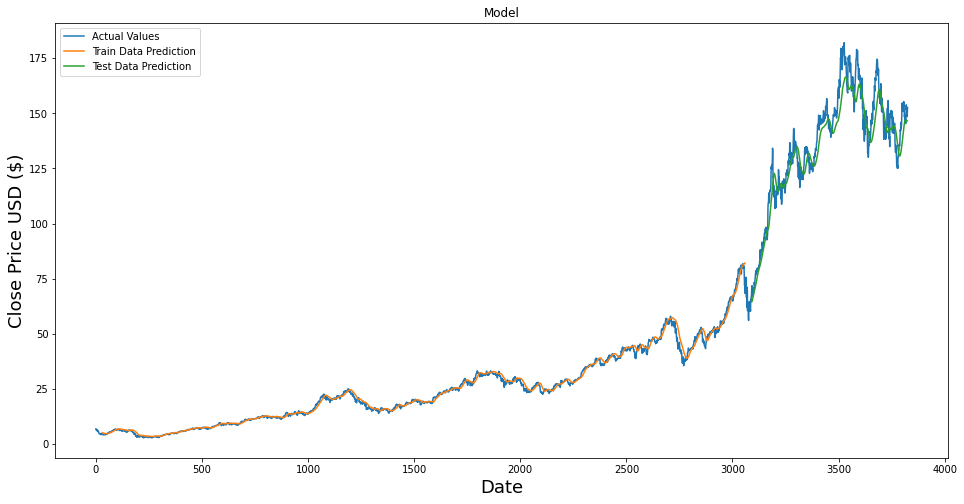

In [91]:
#Plot the data
look_back = 30
trainPredictPlot = np.empty_like(scaled_data) #Create an empty array the same size as the scaled data

trainPredictPlot[:, :] = np.nan #Fill the empty array with NaN values
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict #Fill the array with the training data predictions

#Plot the testing data and the model predictions
testPredictPlot = np.empty_like(scaled_data) #Create an empty array the same size as the scaled data
testPredictPlot[:, :] = np.nan  #Fill the empty array with NaN values
testPredictPlot[len(train_predict)+(look_back*2)+1:len(scaled_data)-1, :] = test_predict #Fill the array with the testing data predictions

#Plot the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot)
#plt.plot(y_test)
plt.plot(testPredictPlot)
plt.legend(['Actual Values', 'Train Data Prediction', 'Test Data Prediction'], loc='upper left')
plt.show()

In [92]:
len(test_data) 

765

In [97]:
#Get the last 30 days of the training data and convert it to an array (765 - 30 = 685)
x_input = test_data[735:].reshape(1,-1) #Predict the closing price for the next 30 days starting from 685
x_input.shape

(1, 30)

In [98]:
#Convert the data to a list
temp_input = list(x_input)
temp_input = temp_input[0].tolist() #Convert the data to a list

print(len(temp_input)) #The length of the list should be 30 as we are predicting the closing price for the next 30 days

30


In [99]:
#Predict the closing price for the next 30 days
from numpy import array

lst_output = []
n_steps = 30
i = 0
while(i<30):
      #if the length of the list is greater than 30, then we will shift by 1 day and take new output as the input for the next day prediction
      if(len(temp_input)>30): #
          #print(temp_input)
          x_input = np.array(temp_input[1:])
          print("{} day input {}".format(i,x_input))
          x_input = x_input.reshape(1,-1)
          x_input = x_input.reshape((1, n_steps, 1))
          #print(x_input)
          yhat = model.predict(x_input, verbose=0)
          print("{} day output {}".format(i,yhat))
          temp_input.extend(yhat[0].tolist())
          temp_input = temp_input[1:]
          #print(temp_input)
          lst_output.extend(yhat.tolist())
          i=i+1
      #If the length of the list is less than 30, then we will add the last 30 days to the list and predict the next 30 days
      else:
          x_input = x_input.reshape((1, n_steps,1)) #Reshape the data to fit the model
          yhat = model.predict(x_input, verbose=0)  #Predict the closing price for the next 30 days
          print(yhat[0]) #Print the predicted closing price
          temp_input.extend(yhat[0].tolist()) #Add the predicted closing price to the list
          print(len(temp_input)) #The length of the list should be 30
          lst_output.extend(yhat.tolist()) #Add the predicted closing price to previous list (temp_input)
          i=i+1 

[0.8023395]
31
1 day input [0.79589005 0.82596538 0.84649909 0.83104295 0.84733602 0.83210313
 0.8262443  0.82702547 0.84287223 0.8392453  0.85113035 0.84209106
 0.83561845 0.81290852 0.81530789 0.81804195 0.8030323  0.80978384
 0.80693816 0.79522049 0.79856842 0.82713709 0.84276061 0.83031763
 0.83740395 0.82468196 0.81302014 0.8240124  0.8358416  0.80233949]
1 day output [[0.8024479]]
2 day input [0.82596538 0.84649909 0.83104295 0.84733602 0.83210313 0.8262443
 0.82702547 0.84287223 0.8392453  0.85113035 0.84209106 0.83561845
 0.81290852 0.81530789 0.81804195 0.8030323  0.80978384 0.80693816
 0.79522049 0.79856842 0.82713709 0.84276061 0.83031763 0.83740395
 0.82468196 0.81302014 0.8240124  0.8358416  0.80233949 0.80244792]
2 day output [[0.80234945]]
3 day input [0.84649909 0.83104295 0.84733602 0.83210313 0.8262443  0.82702547
 0.84287223 0.8392453  0.85113035 0.84209106 0.83561845 0.81290852
 0.81530789 0.81804195 0.8030323  0.80978384 0.80693816 0.79522049
 0.79856842 0.82713709

In [100]:
day_new = np.arange(1,31) #Create a new array with the previous 30 days
day_pred = np.arange(31,61) #Create a new array with the next 30 days

In [ ]:
#Print the predicted closing price for the next 30 days and inverse the scale
print(scaler.inverse_transform(lst_output))

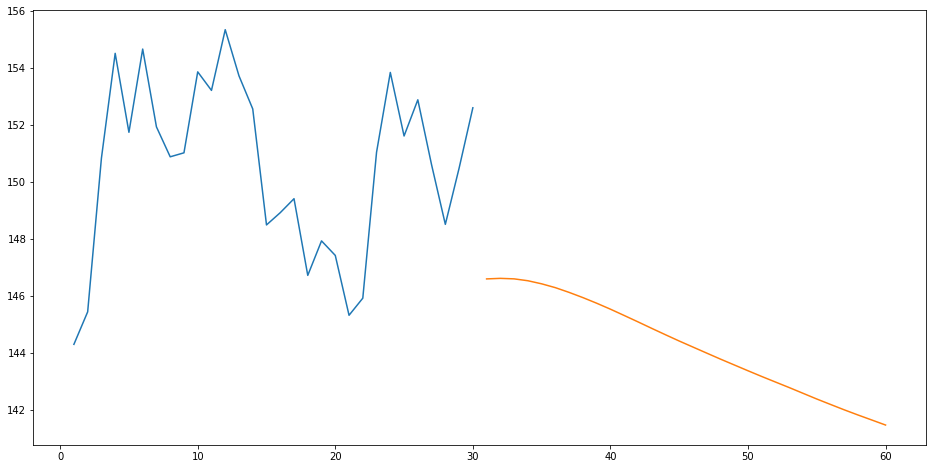

In [103]:
plt.figure(figsize=(16,8))
plt.plot(day_new, scaler.inverse_transform(scaled_data[3796:])) #Plot the previous 30 days
plt.plot(day_pred, scaler.inverse_transform(lst_output)) #Plot the next 30 days
plt.show()


In [104]:
#Get the root mean squared error (RMSE) for the training data and the testing data
rmse = np.sqrt(np.mean(train_predict - y_train)**2)
print(rmse)

rmse = np.sqrt(np.mean(test_predict - y_test)**2)
print(rmse)


24.809258767368835
132.5551273599969


In [105]:
#Get performance metrics for the model on the training and testing data using root mean squared error (RMSE)
trainScore = math.sqrt(mean_squared_error(y_train, train_predict))
testScore = math.sqrt(mean_squared_error(y_test, test_predict))

print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 29.68 RMSE
Test Score: 134.53 RMSE


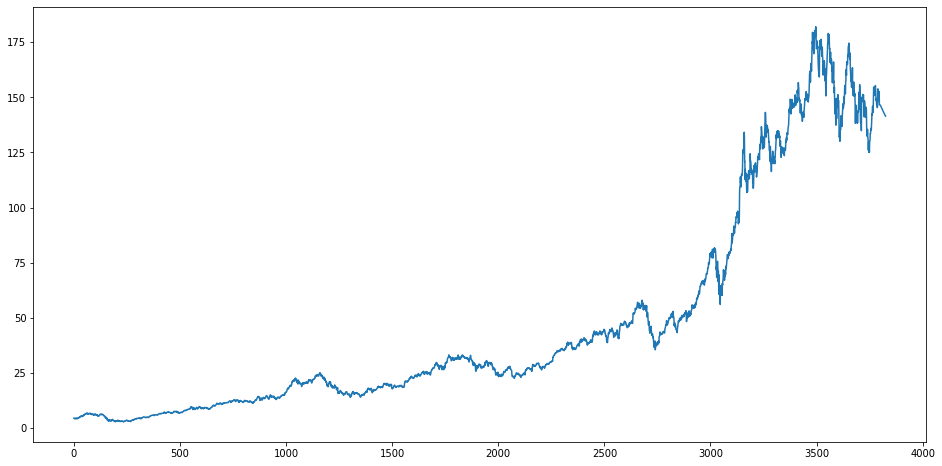

In [106]:
len(data)
df3 = data.values.tolist()
df3 = df3[:]
df3.extend(scaler.inverse_transform(lst_output))
plt.figure(figsize=(16,8))
plt.plot(df3[30:])
plt.show()
